In [1]:
import pandas as pd
import numpy as np
import xarray as xr
import datashader as ds
import datashader.glyphs
import datashader.transfer_functions as tf
from collections import OrderedDict

np.random.seed(1)
num=10000

dists = {cat: pd.DataFrame(dict(x=np.random.normal(x,s,num),
                                y=np.random.normal(y,s,num),
                                val=val,cat=cat))
         for x,y,s,val,cat in 
         [(2,2,0.01,10,"d1"), (2,-2,0.1,20,"d2"), (-2,-2,0.5,30,"d3"), (-2,2,1.0,40,"d4"), (0,0,3,50,"d5")]}

df = pd.concat(dists,ignore_index=True)
df["cat"]=df["cat"].astype("category")
df.tail()

,cat,val,x,y
49995,d5,50,-1.397579,0.610189
49996,d5,50,-2.649610,3.080821
49997,d5,50,1.933360,0.243676
49998,d5,50,4.306374,1.032139
49999,d5,50,-0.493567,-2.242669


CPU times: user 383 ms, sys: 14.2 ms, total: 397 ms
Wall time: 395 ms


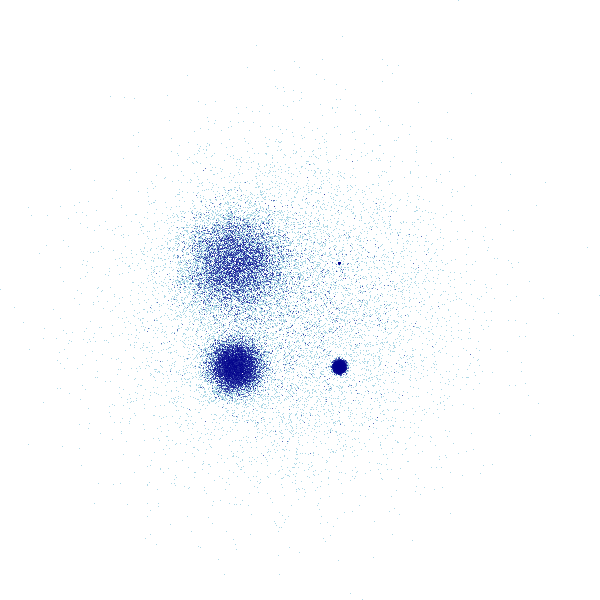

In [2]:
%time tf.shade(ds.Canvas().points(df,'x','y'))


In [3]:
glyph = ds.glyphs.Point('x', 'y')
canvas = ds.Canvas(plot_width=200, plot_height=200, x_range=(-8,8), y_range=(-8,8))


In [5]:
from datashader import reductions
reduction = reductions.count()

from datashader.core import bypixel
agg = bypixel(df, canvas, glyph, reduction)
agg

<xarray.DataArray (y: 200, x: 200)>
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)
Coordinates:
  * y        (y) float64 -7.96 -7.88 -7.8 -7.72 -7.64 -7.56 -7.48 -7.4 -7.32 ...
  * x        (x) float64 -7.96 -7.88 -7.8 -7.72 -7.64 -7.56 -7.48 -7.4 -7.32 ...

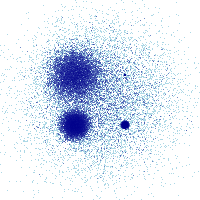

In [6]:
tf.shade(canvas.points(df,'x','y',agg=reductions.count()))


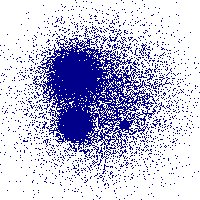

In [9]:
tf.shade(canvas.points(df,'x','y',agg=reductions.any()))


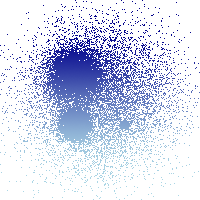

In [11]:
tf.shade(canvas.points(df,'x','y',agg=reductions.mean('y')))


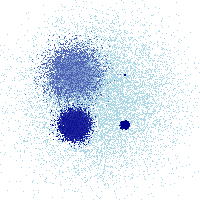

In [12]:
tf.shade(50-canvas.points(df,'x','y',agg=reductions.mean('val')))
